In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from collections import defaultdict, Counter

In [3]:
idx = 200

In [4]:
STATIC_DYNAMIC_DATA_DIR = '/work/InternalMedicine/s223850/ED-StaticDynamic/static_dynamic_ds/'
STATIC_FILE = f'static_{idx}.csv'
DYNAMIC_FILE = f'dynamic_{idx}.csv'
RAW_DATA = '/work/InternalMedicine/s223850/raw_data/ED Events - 11.21.23.csv'

In [5]:
df_raw = pd.read_csv(RAW_DATA)
unamed_cols = [col for col in df_raw.columns if 'unnamed' in col.lower()]
if len(unamed_cols) >= 1:
    df_raw.drop(columns = unamed_cols, inplace=True)
df_raw['Calculated_DateTime'] = pd.to_datetime(df_raw['Calculated_DateTime'])

In [19]:
df_last_row = df_raw.sort_values(by='Calculated_DateTime').groupby('PAT_ENC_CSN_ID').apply(lambda g: g.iloc[-1])

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16612859 entries, 0 to 16612858
Data columns (total 29 columns):
 #   Column                                                                  Dtype         
---  ------                                                                  -----         
 0   PAT_ENC_CSN_ID                                                          int64         
 1   PAT_MRN_ID                                                              int64         
 2   PAT_ID                                                                  object        
 3   Ethnicity                                                               object        
 4   FirstRace                                                               object        
 5   MultiRacial                                                             int64         
 6   Sex                                                                     object        
 7   Arrived_Time                                        

In [52]:
df_last_row['Acuity_Level'].isna().sum()/len(df_last_row)

0.05316975106926876

# Analyzing static features

In [9]:
df_static = pd.read_csv(os.path.join(STATIC_DYNAMIC_DATA_DIR, STATIC_FILE))
# df_static['Arrived_Time'] == pd.to_datetime(df_static['Arrived_Time'])
df_static = df_static.loc[~(df_static['Arrived_Time_appx'] == '-1')]
df_static['Arrived_Time_appx'] = pd.to_datetime(df_static['Arrived_Time_appx'])

In [10]:
df_static.isna().sum()

Unnamed: 0                                                                   0
PAT_ENC_CSN_ID                                                               0
Ethnicity                                                                    0
Sex                                                                          0
MultiRacial                                                                  0
Admitted_YN                                                                  0
Patient_Age                                                                  0
Coverage_Financial_Class_Grouper                                             0
Has Completed Appt in Last Seven Days                                        0
Has Hospital Encounter in Last Seven Days                                    0
Number of Inpatient Admissions in the last 30 Days                           0
Number of past appointments in last 60 days                                  0
Number of past inpatient admissions over ED visits i

In [48]:
df_static[(df_static['Acuity_Level'].isna())&(df_static['Admitted_YN']=='Admitted')]['PAT_ENC_CSN_ID']

35        651560517
47        651568412
95        651593401
97        651593885
100       651595176
            ...    
110067    693310211
110142    693315844
110154    693317099
110164    693318058
110261    693375128
Name: PAT_ENC_CSN_ID, Length: 2290, dtype: int64

In [30]:
df_static[df_static['Acuity_Level'].isna()]['Admitted_YN'].value_counts()

Admitted        2290
Not Admitted    1455
Name: Admitted_YN, dtype: int64

In [20]:
df_static['Admitted_YN'].value_counts()

Not Admitted    66369
Admitted        43928
Name: Admitted_YN, dtype: int64

In [ ]:
df

In [50]:
unamed_cols = [col for col in df_static.columns if 'unnamed' in col.lower()]
if len(unamed_cols) >= 1:
    df_static.drop(columns = unamed_cols, inplace=True)

In [51]:
df_static.shape

(110300, 18)

In [52]:
df_static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110300 entries, 0 to 110299
Data columns (total 18 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   PAT_ENC_CSN_ID                                                          110300 non-null  int64  
 1   Ethnicity                                                               110300 non-null  object 
 2   Sex                                                                     110300 non-null  object 
 3   MultiRacial                                                             110300 non-null  int64  
 4   Arrived_Time                                                            110300 non-null  object 
 5   Admitted_YN                                                             110300 non-null  object 
 6   Patient_Age                                                         

In [78]:
df_static.shape

(110300, 18)

In [83]:
df_static['Arrived_Time_appx'].dt.year.value_counts()

2022    53240
2023    48260
2021     8787
2017        1
2019        1
Name: Arrived_Time_appx, dtype: int64

In [81]:
df_static['Arrived_Time_appx'].min(), df_static['Arrived_Time_appx'].max()

(Timestamp('2017-04-02 09:58:34'), Timestamp('2023-11-20 20:46:30'))

In [57]:
df_static['Arrived_Time'].min(), df_static['Arrived_Time'].max()

(Timestamp('2021-11-01 00:44:00'), Timestamp('2023-11-20 20:46:00'))

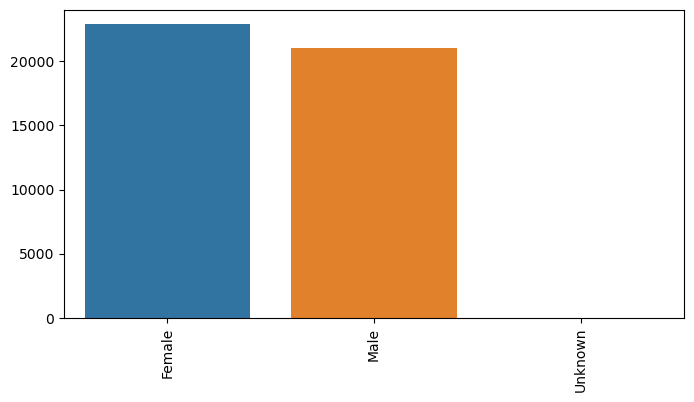

In [110]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
vv = df_static[df_static['Admitted_YN']=='Admitted']['Sex'].value_counts()
ax = sns.barplot(x=vv.index, y=vv.values, ax=ax)
_ =ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

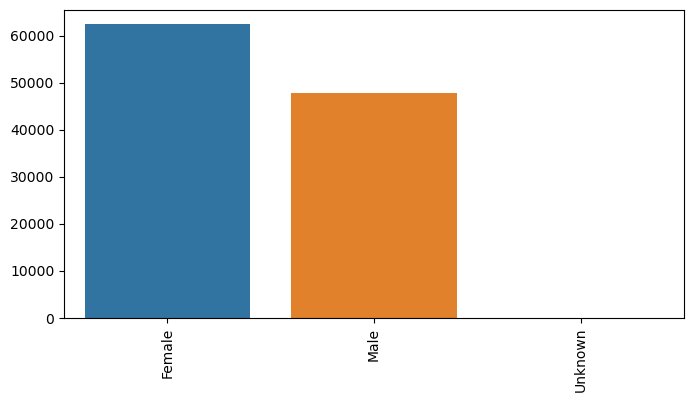

In [106]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
vv = df_static['Sex'].value_counts()
ax = sns.barplot(x=vv.index, y=vv.values, ax=ax)
_ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

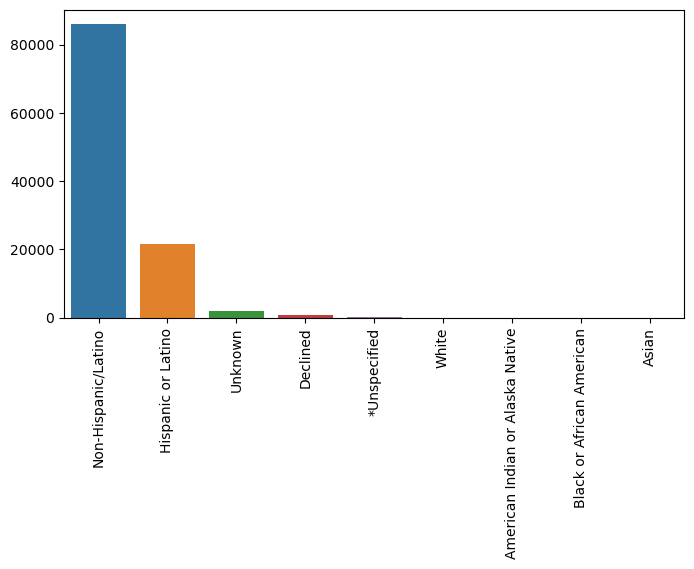

In [70]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
vv = df_static['Ethnicity'].value_counts()
ax = sns.barplot(x=vv.index, y=vv.values, ax=ax)
_ =ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

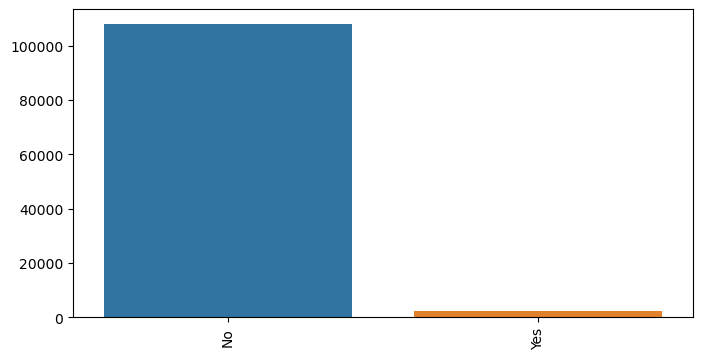

In [72]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
vv = df_static['MultiRacial'].value_counts()
ax = sns.barplot(x=vv.index, y=vv.values, ax=ax)
_ =ax.set_xticklabels(labels=['No', 'Yes'], rotation=90)

/tmp/ipykernel_71426/67144490.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_static['Patient_Age'])


<Axes: xlabel='Patient_Age', ylabel='Density'>

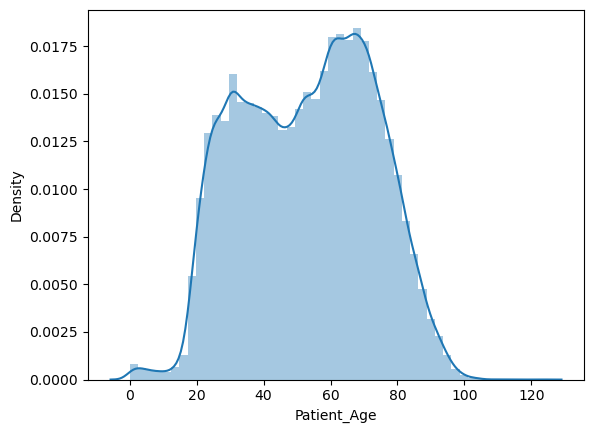

In [59]:
sns.distplot(df_static['Patient_Age'])

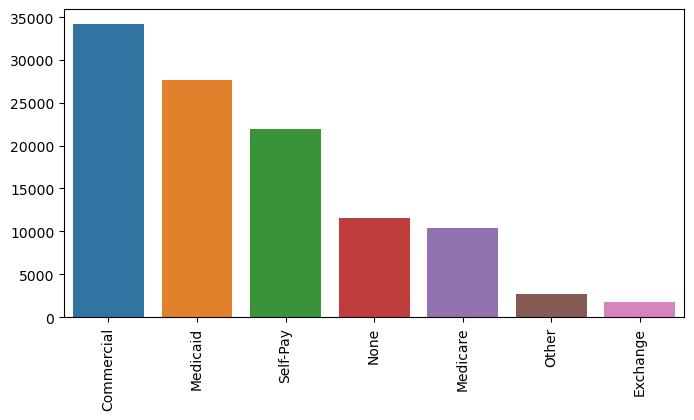

In [73]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
vv = df_static['Coverage_Financial_Class_Grouper'].value_counts()
ax = sns.barplot(x=vv.index, y=vv.values, ax=ax)
_ =ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)


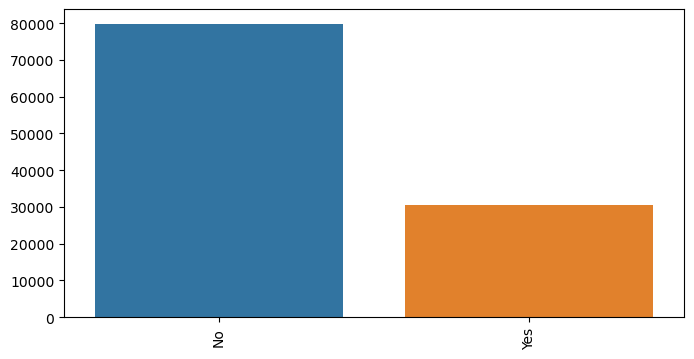

In [84]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
vv = df_static['Has Completed Appt in Last Seven Days'].value_counts()
ax = sns.barplot(x=vv.index, y=vv.values, ax=ax)
_ =ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

In [89]:
df_static['Number of Inpatient Admissions in the last 30 Days'].value_counts()

0      99597
2       1383
3       1176
4        982
1        940
       ...  
176        1
114        1
456        1
532        1
339        1
Name: Number of Inpatient Admissions in the last 30 Days, Length: 94, dtype: int64

<Axes: >

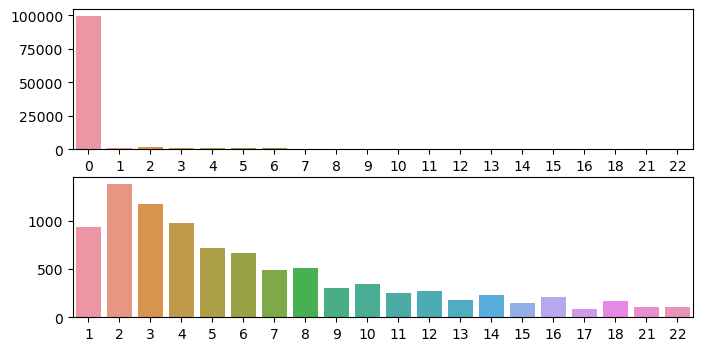

In [92]:
fig, ax = plt.subplots(2,1,figsize=(8,4))
vv = df_static['Number of Inpatient Admissions in the last 30 Days'].value_counts().iloc[:20]
sns.barplot(x=vv.index, y=vv.values, ax=ax[0])
vv = df_static['Number of Inpatient Admissions in the last 30 Days'].value_counts().iloc[1:21]
sns.barplot(x=vv.index, y=vv.values, ax=ax[1])

# _ =ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

<Axes: >

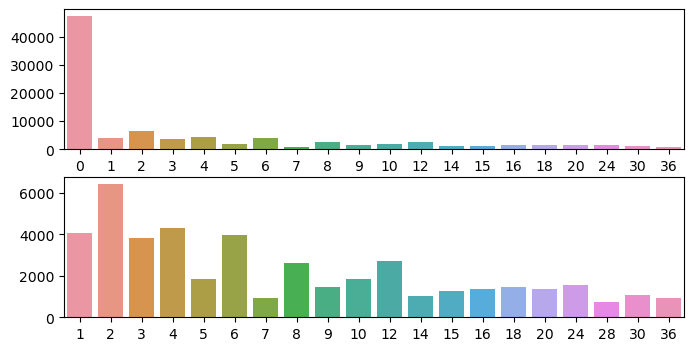

In [94]:
fig, ax = plt.subplots(2,1,figsize=(8,4))
vv = df_static['Number of past appointments in last 60 days'].value_counts().iloc[:20]
sns.barplot(x=vv.index, y=vv.values, ax=ax[0])
vv = df_static['Number of past appointments in last 60 days'].value_counts().iloc[1:21]
sns.barplot(x=vv.index, y=vv.values, ax=ax[1])

<Axes: >

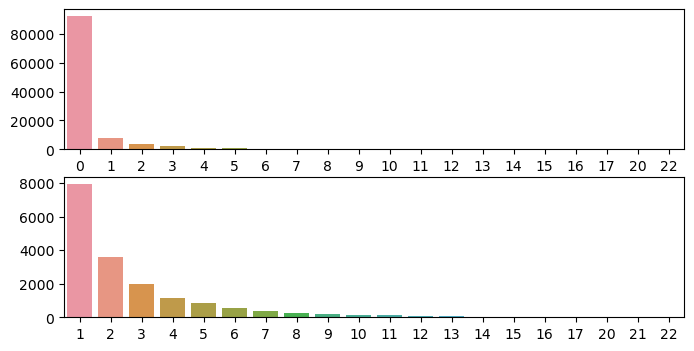

In [95]:
fig, ax = plt.subplots(2,1,figsize=(8,4))
vv = df_static['Number of past inpatient admissions over ED visits in last three years'].value_counts().iloc[:20]
sns.barplot(x=vv.index, y=vv.values, ax=ax[0])
vv = df_static['Number of past inpatient admissions over ED visits in last three years'].value_counts().iloc[1:21]
sns.barplot(x=vv.index, y=vv.values, ax=ax[1])

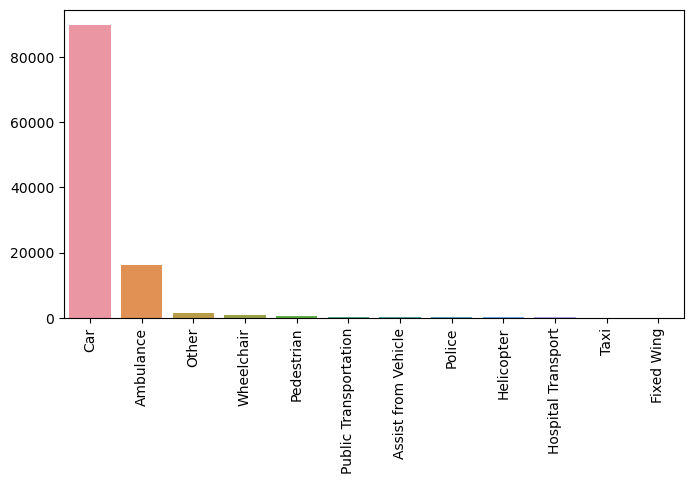

In [104]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
vv = df_static['Means_Of_Arrival'].value_counts()
sns.barplot(x=vv.index, y=vv.values, ax=ax)
_ =ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)


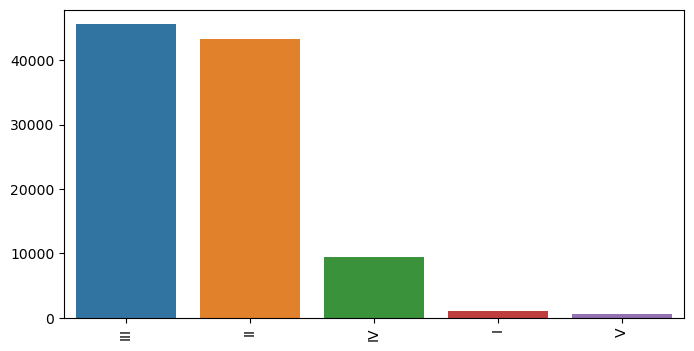

In [105]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
vv = df_static['Acuity_Level'].value_counts()
sns.barplot(x=vv.index, y=vv.values, ax=ax)
_ =ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

In [124]:
df_static.columns

Index(['PAT_ENC_CSN_ID', 'Ethnicity', 'Sex', 'MultiRacial', 'Arrived_Time',
       'Admitted_YN', 'Patient_Age', 'Coverage_Financial_Class_Grouper',
       'Has Completed Appt in Last Seven Days',
       'Has Hospital Encounter in Last Seven Days',
       'Number of Inpatient Admissions in the last 30 Days',
       'Number of past appointments in last 60 days',
       'Number of past inpatient admissions over ED visits in last three years',
       'Chief_Complaint_All', 'Count_of_Chief_Complaints', 'Means_Of_Arrival',
       'Acuity_Level', 'Arrived_Time_appx'],
      dtype='object')

<Axes: >

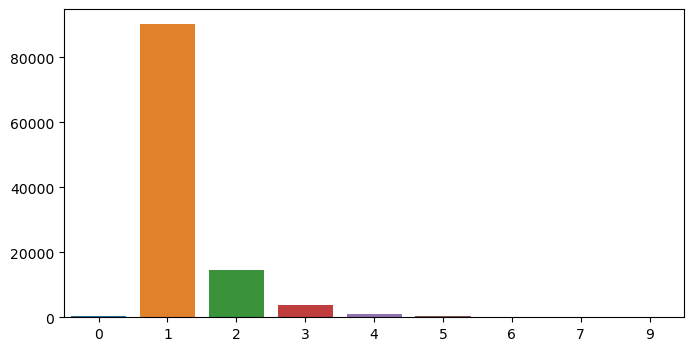

In [131]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
vv = df_static['Count_of_Chief_Complaints'].value_counts()
sns.barplot(x=vv.index, y=vv.values, ax=ax)

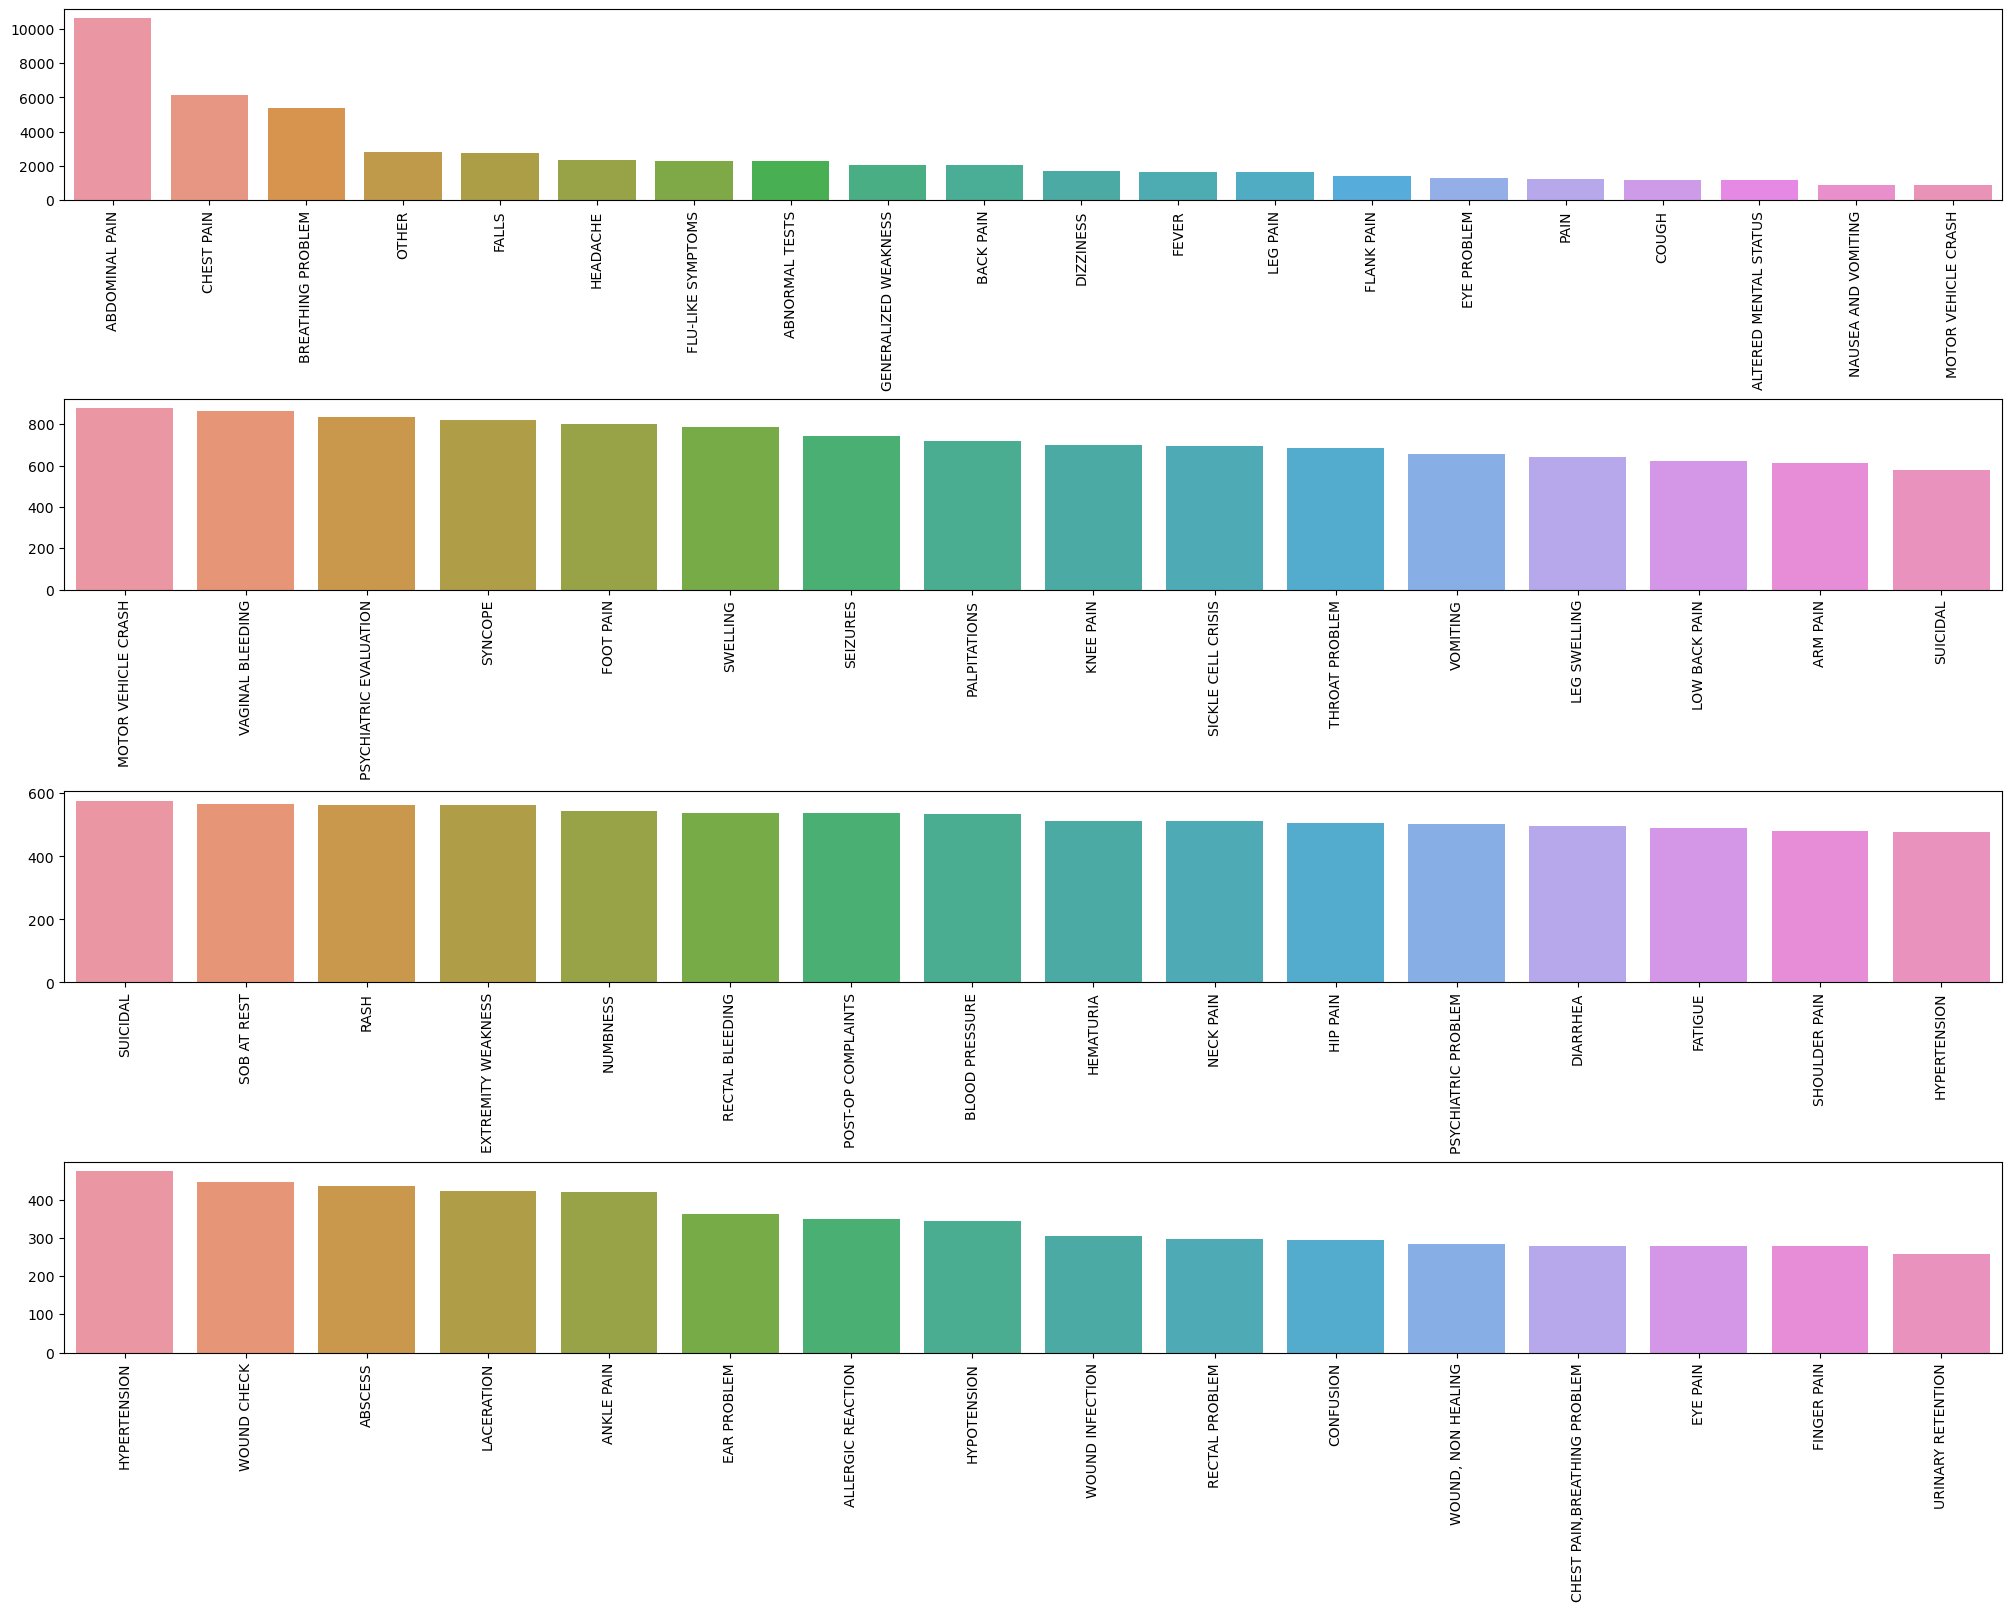

In [140]:
fig, ax = plt.subplots(4,1,figsize=(20,16), constrained_layout=True)
vv = df_static['Chief_Complaint_All'].value_counts().iloc[:20]
sns.barplot(x=vv.index, y=vv.values, ax=ax[0])
_ =ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=90)
vv = df_static['Chief_Complaint_All'].value_counts().iloc[19:35]
sns.barplot(x=vv.index, y=vv.values, ax=ax[1])
_ =ax[1].set_xticklabels(labels=ax[1].get_xticklabels(), rotation=90)

vv = df_static['Chief_Complaint_All'].value_counts().iloc[34:50]
sns.barplot(x=vv.index, y=vv.values, ax=ax[2])
_ =ax[2].set_xticklabels(labels=ax[2].get_xticklabels(), rotation=90)

vv = df_static['Chief_Complaint_All'].value_counts().iloc[49:65]
sns.barplot(x=vv.index, y=vv.values, ax=ax[3])
_ =ax[3].set_xticklabels(labels=ax[3].get_xticklabels(), rotation=90)


In [179]:
chief_complaint_all_list = df_static['Chief_Complaint_All'].apply(lambda x: x.split(',') if isinstance(x, str) else [x])
df_static['Chief_Complaint_All_list'] = chief_complaint_all_list

In [145]:
all_complaints = []
for complain_list in chief_complaint_all_list:
    if not isinstance(complain_list[0], str):
        continue
    all_complaints.extend(complain_list)
    

In [147]:
len(all_complaints), len(set(all_complaints))

(136728, 581)

In [174]:
counts = Counter(all_complaints).most_common()
names = list(map(lambda x: x[0].strip(), counts))
c = list(map(lambda x: x[1], counts))

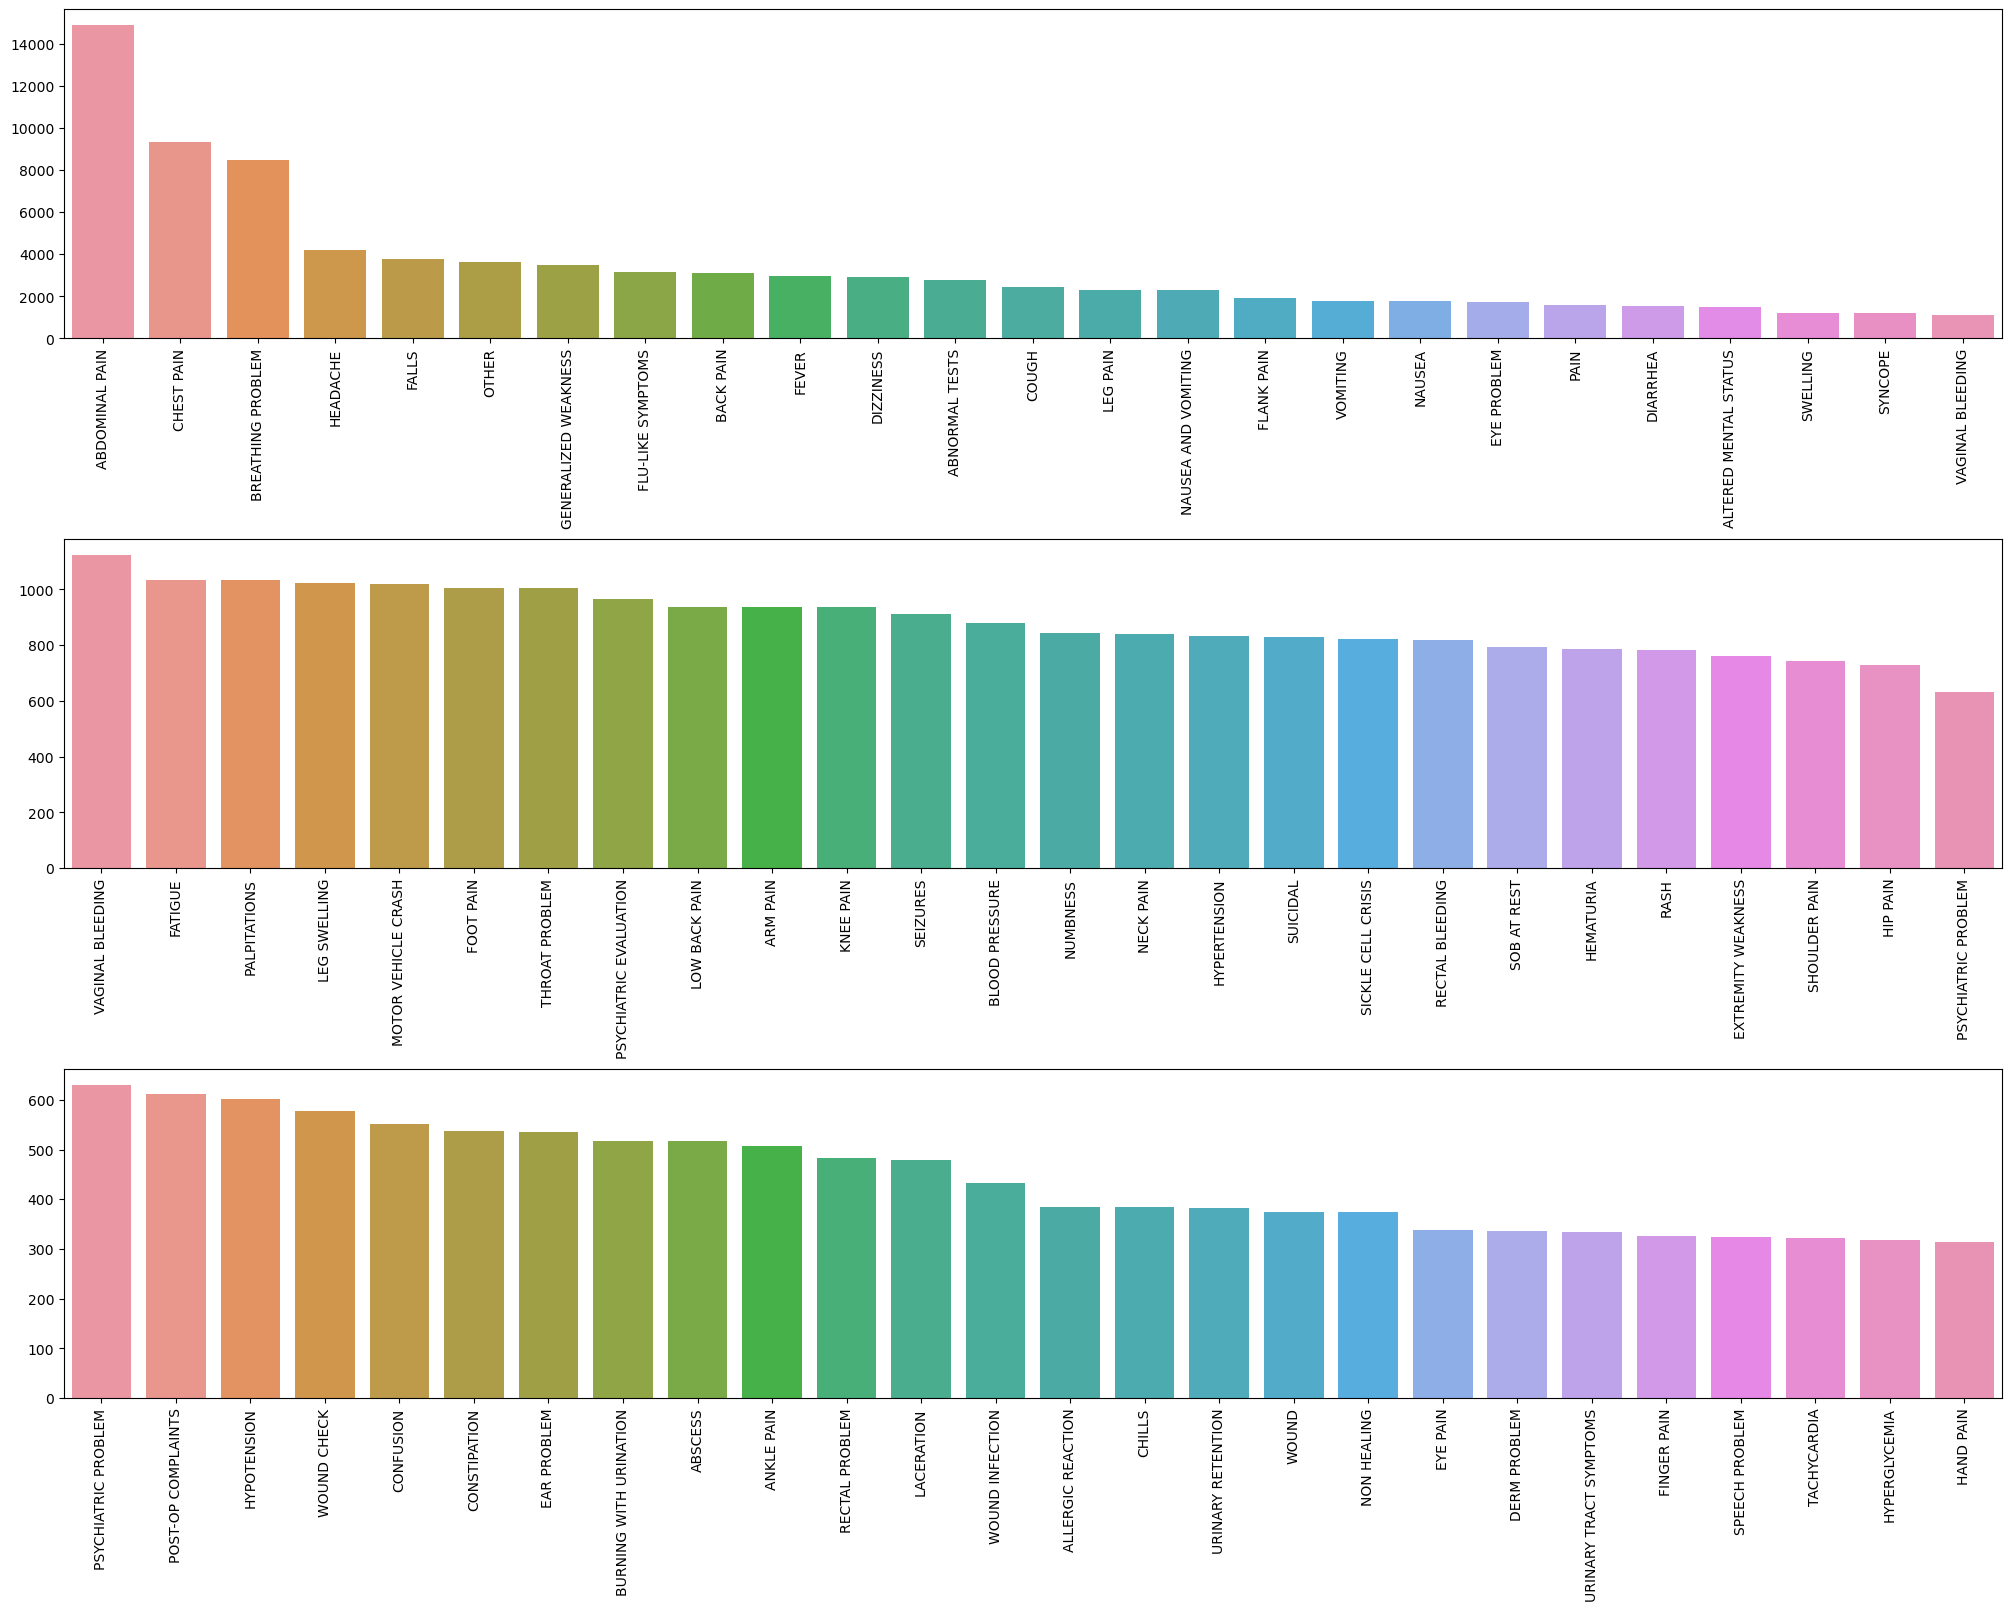

In [175]:
fig, ax = plt.subplots(3,1,figsize=(20,16), constrained_layout=True)
sns.barplot(x=names[:25], y=c[:25], ax=ax[0])
_ =ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=90)

sns.barplot(x=names[24:50], y=c[24:50], ax=ax[1])
_ =ax[1].set_xticklabels(labels=ax[1].get_xticklabels(), rotation=90)

sns.barplot(x=names[49:75], y=c[49:75], ax=ax[2])
_ =ax[2].set_xticklabels(labels=ax[2].get_xticklabels(), rotation=90)

# vv = df_static['Chief_Complaint_All'].value_counts().iloc[49:65]
# sns.barplot(x=vv.index, y=vv.values, ax=ax[3])
# _ =ax[3].set_xticklabels(labels=ax[3].get_xticklabels(), rotation=90)

In [176]:
cn = list(map(lambda x: x/sum(c), c))

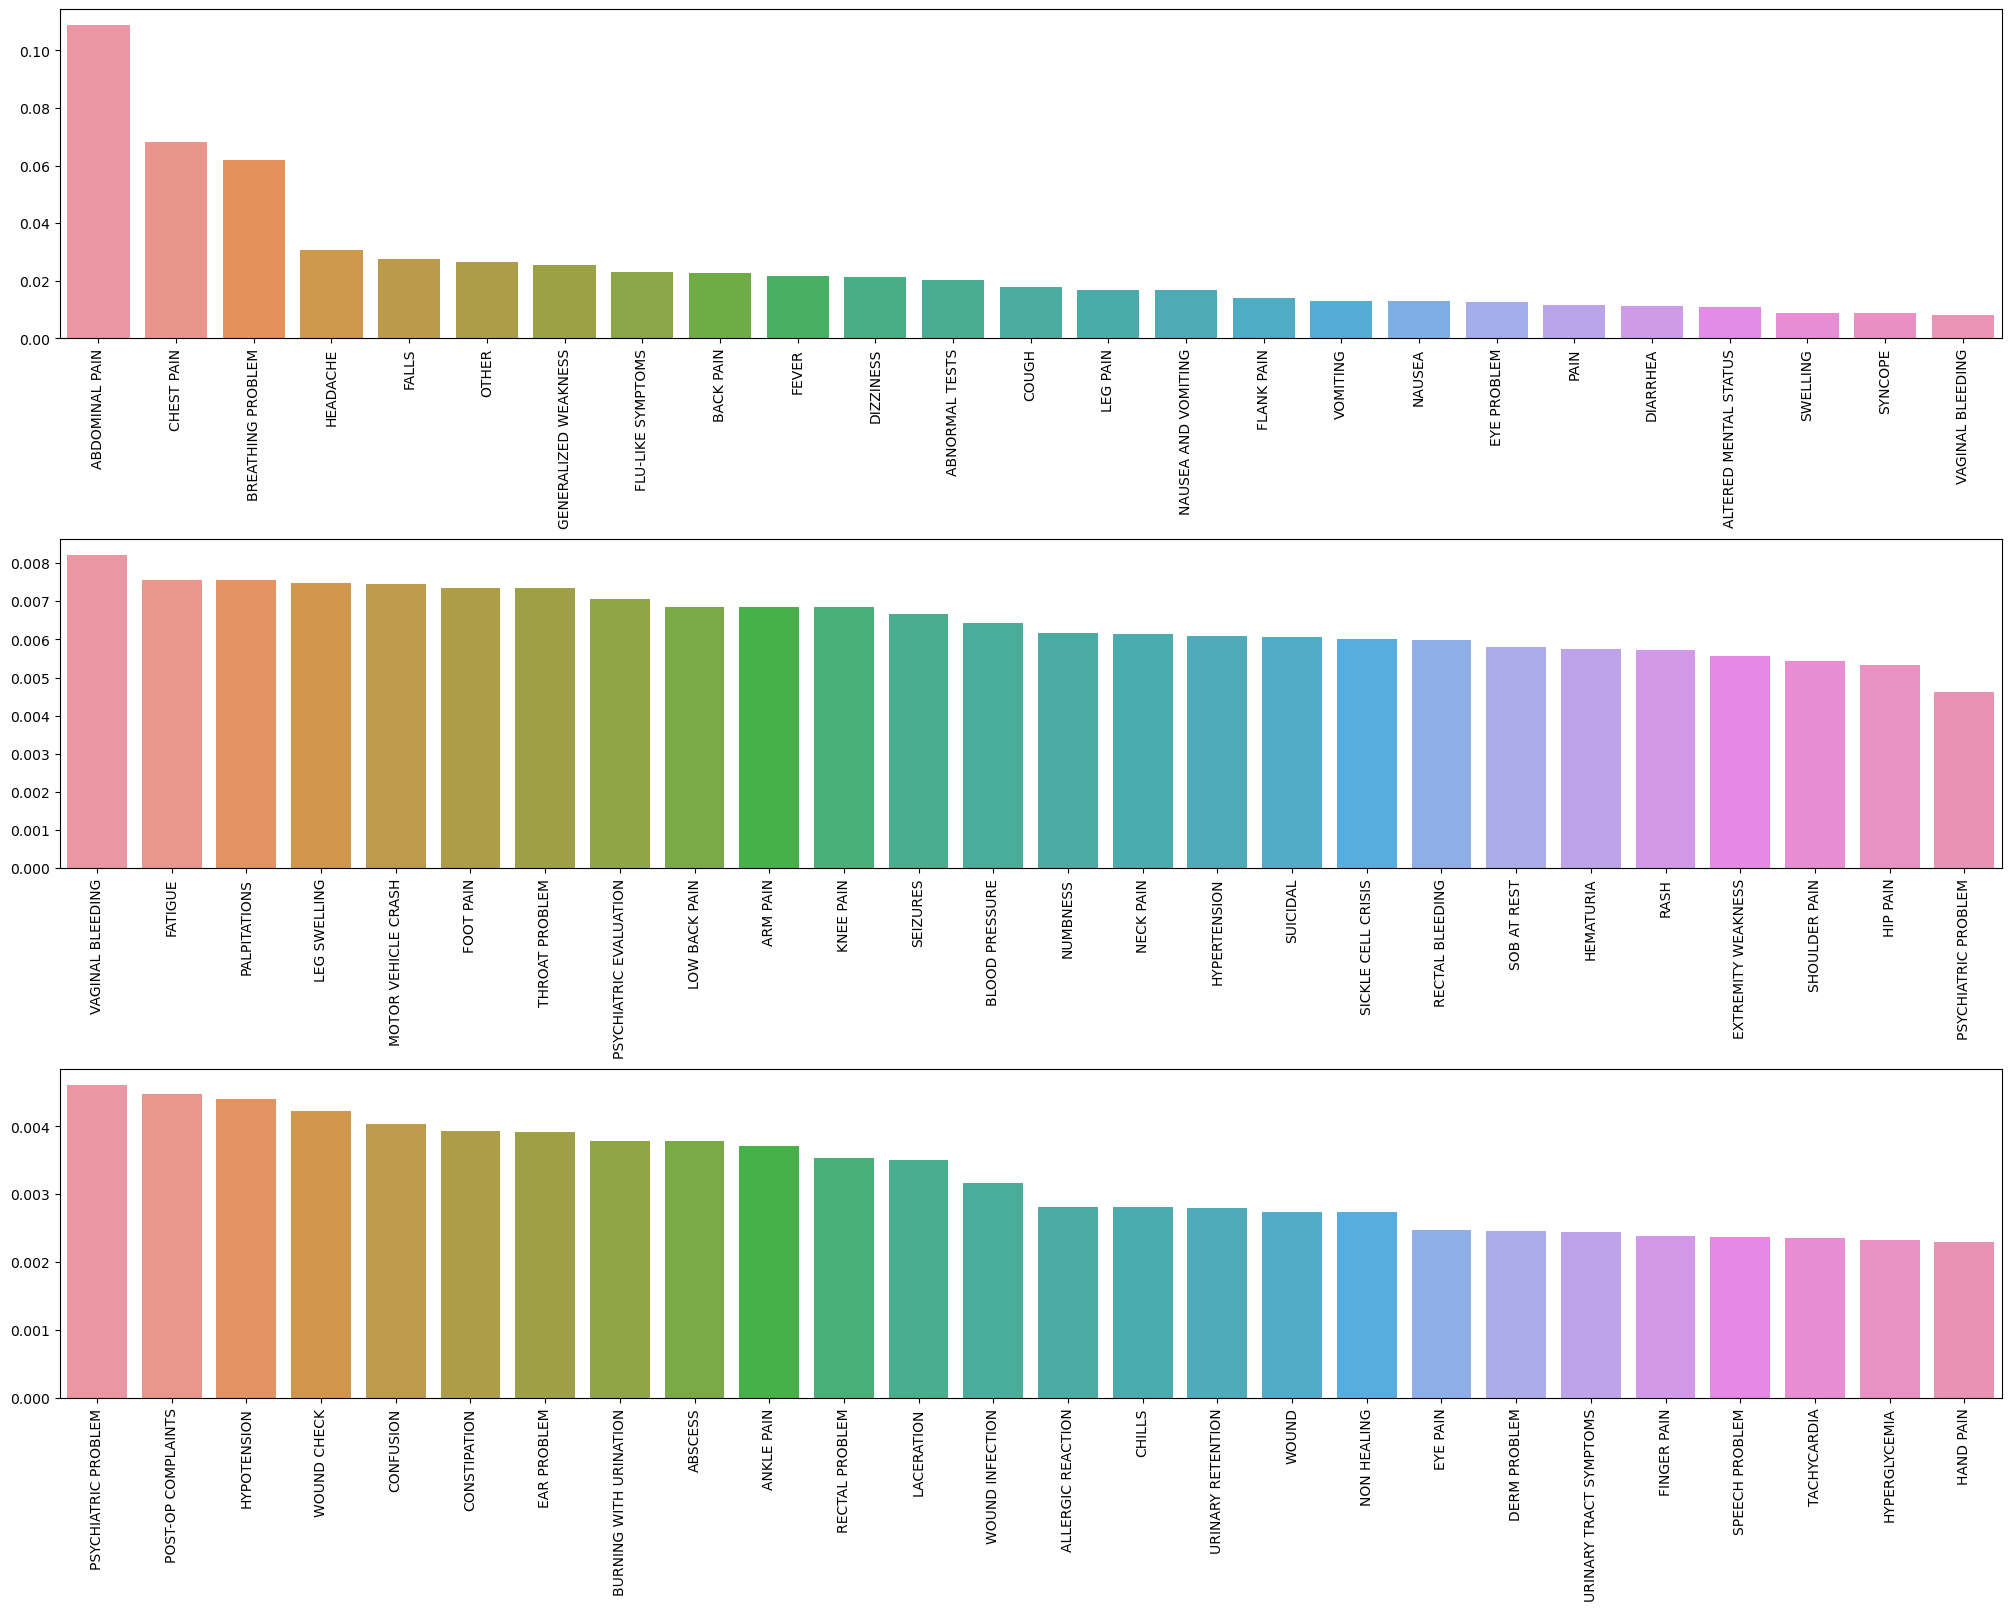

In [178]:
fig, ax = plt.subplots(3,1,figsize=(20,16), constrained_layout=True)
sns.barplot(x=names[:25], y=cn[:25], ax=ax[0])
_ =ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=90)

sns.barplot(x=names[24:50], y=cn[24:50], ax=ax[1])
_ =ax[1].set_xticklabels(labels=ax[1].get_xticklabels(), rotation=90)

sns.barplot(x=names[49:75], y=cn[49:75], ax=ax[2])
_ =ax[2].set_xticklabels(labels=ax[2].get_xticklabels(), rotation=90)


In [286]:
df_association = pd.DataFrame(0, index=names, columns=names)
for id, (idx, item) in enumerate(df_static['Chief_Complaint_All_list'].iteritems()):
    if not isinstance(item[0], str):
        continue
        
    # df_association.loc[item[0].strip(), item[0].strip()] += 1
    if len(item) == 1:
        continue
    for it in item[1:]:
        df_association.loc[item[0].strip(), it.strip()] += 1

/tmp/ipykernel_71426/3822177511.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for id, (idx, item) in enumerate(df_static['Chief_Complaint_All_list'].iteritems()):


In [287]:
df_association.drop(columns=df_association.columns[df_association.sum(axis=0)==0], inplace=True)
df_association.drop(df_association.index[df_association.sum(axis=1)==0], inplace=True)

In [288]:
rows, cols = np.where(df_association<=20)

In [289]:
for idx in range(len(rows)):
    df_association.iloc[rows[idx], cols[idx]] = 0

In [290]:
df_association.drop(columns=df_association.columns[df_association.sum(axis=0)==0], inplace=True)
df_association.drop(df_association.index[df_association.sum(axis=1)==0], inplace=True)

In [292]:
df_association.shape

(36, 53)

<Axes: >

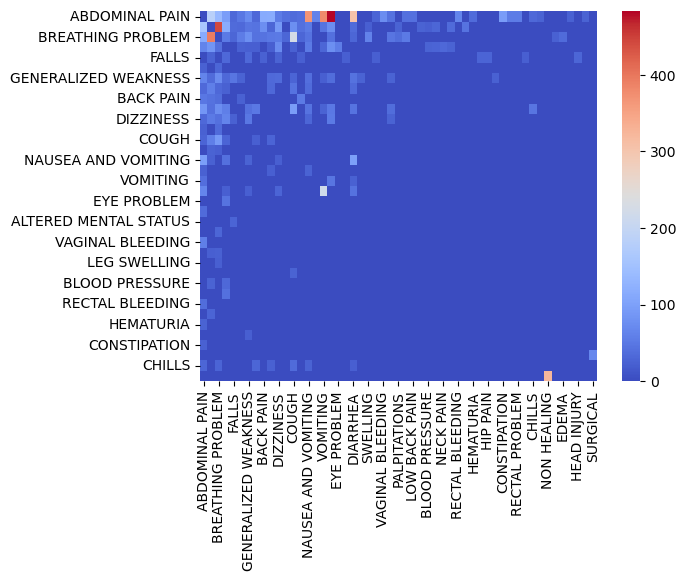

In [291]:
sns.heatmap(df_association, cmap='coolwarm')

# Analyzing dynamic features

In [33]:
df_dynamic = pd.read_csv(os.path.join(STATIC_DYNAMIC_DATA_DIR, DYNAMIC_FILE))
unamed_cols = [col for col in df_dynamic.columns if 'unnamed' in col.lower()]
if len(unamed_cols) >= 1:
    df_dynamic.drop(columns = unamed_cols, inplace=True)
df_dynamic['Calculated_DateTime'] = pd.to_datetime(df_dynamic['Calculated_DateTime'])

In [34]:
df_dynamic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10062338 entries, 0 to 10062337
Data columns (total 8 columns):
 #   Column               Dtype         
---  ------               -----         
 0   PAT_ENC_CSN_ID       int64         
 1   Type                 object        
 2   EVENT_NAME           object        
 3   Order_Status         object        
 4   Result_Flag          object        
 5   Primary_DX_Name      object        
 6   Primary_DX_ICD10     object        
 7   Calculated_DateTime  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 614.2+ MB


In [38]:
df_dynamic[df_dynamic['EVENT_NAME'] == 'Admission Med List Generated']['PAT_ENC_CSN_ID']

0            86725001
101         619927095
112         651542751
142         651542792
172         651542795
              ...    
10062001    693399528
10062096    693399583
10062179    693401044
10062291    693401129
10062309    693401341
Name: PAT_ENC_CSN_ID, Length: 110270, dtype: int64

In [46]:
df_dynamic[df_dynamic['PAT_ENC_CSN_ID']==651542751]

,PAT_ENC_CSN_ID,Type,EVENT_NAME,Order_Status,Result_Flag,Primary_DX_Name,Primary_DX_ICD10,Calculated_DateTime
109,651542751,Event,Emergency encounter created,NaN,NaN,NaN,NaN,2021-11-01 00:44:25
110,651542751,Event,Admission FAM List Generated,NaN,NaN,NaN,NaN,2021-11-01 00:44:44
111,651542751,Event,Patient arrived in ED,NaN,NaN,NaN,NaN,2021-11-01 00:44:44
112,651542751,Event,Admission Med List Generated,NaN,NaN,NaN,NaN,2021-11-01 00:44:44
113,651542751,Event,Prev Admission Rec Generated,NaN,NaN,NaN,NaN,2021-11-01 00:44:44
114,651542751,Event,ED SECONDARY TRIAGE,NaN,NaN,NaN,NaN,2021-11-01 00:47:53
115,651542751,Event,POSS Documented,NaN,NaN,NaN,NaN,2021-11-01 00:49:48
116,651542751,Event,RN Re-Assement Note Filed,NaN,NaN,NaN,NaN,2021-11-01 00:52:21
117,651542751,Event,Triage Completed,NaN,NaN,NaN,NaN,2021-11-01 00:52:27
118,651542751,Event,Patient Moving,NaN,NaN,NaN,NaN,2021-11-01 01:34:48


In [47]:
df_raw['PAT_ENC_CSN_ID'].nunique()

120877